# Problem Set #7

## MACS 30150, Dr. Evans

## Yiqing Zheng

## Problem 1

(a)

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold
from sklearn.metrics import classification_report, mean_squared_error

In [2]:
data = pd.read_csv('data\strongdrink.txt')
data.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
y = data['cultivar']
X = data[['alco', 'malic', 'tot_phen', 'color_int']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=20)
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
pd.DataFrame({"j=1": np.append(clf.intercept_[0], clf.coef_[0]), 
              "j=2": np.append(clf.intercept_[1], clf.coef_[1])},
            index = ["beta_0","beta_1",'beta_2','beta_3','beta_4'])

,j=1,j=2
beta_0,-24.027617,22.780733
beta_1,1.701734,-1.466297
beta_2,-0.265788,-0.332951
beta_3,1.224101,0.663556
beta_4,0.022507,-0.922682


In [4]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.87      1.00      0.93        13
           2       1.00      0.90      0.95        21
           3       1.00      1.00      1.00        10

   micro avg       0.95      0.95      0.95        44
   macro avg       0.96      0.97      0.96        44
weighted avg       0.96      0.95      0.96        44



The error rates are 13%, 0, and 0 for the three groups. The model is best at predicting the third categoy of cultivar for its f1-score is the highest. 

In [5]:
data['cultivar'].value_counts()

2    71
1    59
3    46
Name: cultivar, dtype: int64

From above, we can know that the most accurately predicted category (the third group) is not the one with the most observations.

In [6]:
print('Test set MSE = ', mean_squared_error(y_test, y_pred))

Test set MSE =  0.045454545454545456


(b)

In [7]:
Xvars = data[['alco', 'malic', 'tot_phen', 'color_int']].values
yvars = data['cultivar'].values
N_loo = Xvars.shape[0]
loo = LeaveOneOut()
loo.get_n_splits(Xvars)
MSE_vec = np.zeros(N_loo)

ytest_vec = np.zeros(N_loo)
ypred_vec = np.zeros(N_loo)

for train_index, test_index in loo.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvars[train_index], yvars[test_index]
    LogReg = LogisticRegression(solver='newton-cg', multi_class='multinomial')
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    ypred_vec[test_index] = y_pred
    ytest_vec[test_index] = y_test
    if y_pred == y_test:
        MSE_vec[test_index] = 0
    else:
        MSE_vec[test_index] = 1
    print('MSE for test set', test_index, ' is', MSE_vec[test_index])

MSE for test set [0]  is [0.]
MSE for test set [1]  is [0.]
MSE for test set [2]  is [0.]
MSE for test set [3]  is [0.]
MSE for test set [4]  is [0.]
MSE for test set [5]  is [0.]
MSE for test set [6]  is [0.]
MSE for test set [7]  is [0.]
MSE for test set [8]  is [0.]
MSE for test set [9]  is [0.]
MSE for test set [10]  is [0.]
MSE for test set [11]  is [0.]
MSE for test set [12]  is [0.]
MSE for test set [13]  is [0.]
MSE for test set [14]  is [0.]
MSE for test set [15]  is [0.]
MSE for test set [16]  is [0.]
MSE for test set [17]  is [0.]
MSE for test set [18]  is [0.]
MSE for test set [19]  is [0.]
MSE for test set [20]  is [0.]
MSE for test set [21]  is [0.]
MSE for test set [22]  is [0.]
MSE for test set [23]  is [1.]
MSE for test set [24]  is [0.]
MSE for test set [25]  is [1.]
MSE for test set [26]  is [0.]
MSE for test set [27]  is [0.]
MSE for test set [28]  is [0.]
MSE for test set [29]  is [0.]
MSE for test set [30]  is [0.]
MSE for test set [31]  is [0.]
MSE for test set [

In [8]:
MSE_loo = MSE_vec.mean()
MSE_loo_std = MSE_vec.std()
print('test estimate MSE loocv=', MSE_loo,
      ', test estimate MSE standard err=', MSE_loo_std)

test estimate MSE loocv= 0.07954545454545454 , test estimate MSE standard err= 0.2705882022679695


In [9]:
print(classification_report(ytest_vec, ypred_vec))

              precision    recall  f1-score   support

         1.0       0.90      0.93      0.92        59
         2.0       0.91      0.90      0.91        71
         3.0       0.96      0.93      0.95        46

   micro avg       0.92      0.92      0.92       176
   macro avg       0.92      0.92      0.92       176
weighted avg       0.92      0.92      0.92       176



The error rates are 10%, 9%, and 4% for the three groups. The error rate for the first category decreases compared to part (a), but the error rates for the other categories increase compared to part (a).

(c)

In [28]:
k = 4
kf = KFold(n_splits=4, shuffle=True, random_state=10)
kf.get_n_splits(X)

MSE_vec_kf = np.zeros(k)
ytest_vec_kf = np.zeros(N_loo)
ypred_vec_kf = np.zeros(N_loo)

k_ind = int(0)
for train_index, test_index in kf.split(Xvars):
    # print("TRAIN:", train_index, "TEST:", test_index)
    # print('k index=', k_ind)
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvars[train_index], yvars[test_index]
    LogReg = LogisticRegression(solver='lbfgs',multi_class='multinomial',max_iter=1000)
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    error = [1 if y_test[i] != y_pred[i] else 0 for i in range(len(y_pred))]
    MSE_vec_kf[k_ind] = np.array(error).mean()
    print('MSE for test set', k_ind, ' is', MSE_vec_kf[k_ind])
    ytest_vec_kf[test_index] = y_test
    ypred_vec_kf[test_index] = y_pred
    k_ind += 1

MSE_kf = MSE_vec_kf.mean()
MSE_kf_std = MSE_vec_kf.std()
print('test estimate MSE k-fold=', MSE_kf,
      'test estimate MSE standard err=', MSE_kf_std)

MSE for test set 0  is 0.1590909090909091
MSE for test set 1  is 0.11363636363636363
MSE for test set 2  is 0.045454545454545456
MSE for test set 3  is 0.045454545454545456
test estimate MSE k-fold= 0.09090909090909091 test estimate MSE standard err= 0.04821182598999188


In [30]:
print(classification_report(ytest_vec_kf, ypred_vec_kf))

              precision    recall  f1-score   support

         1.0       0.87      0.93      0.90        59
         2.0       0.91      0.87      0.89        71
         3.0       0.96      0.93      0.95        46

   micro avg       0.91      0.91      0.91       176
   macro avg       0.91      0.91      0.91       176
weighted avg       0.91      0.91      0.91       176



The error rates are 13%, 9%, 4% for each group. Compared to (a), the error rate for the first category remains the same while the error rates for the other two groups increase. Compared to (b), the error rate for the first group increases while the other two groups' error rates remain the same.

The k-fold estimate for the test MSE is 0.091.

## Problem 2

(a)

In [32]:
import matplotlib.pyplot as plt

In [64]:
cool_data = pd.read_csv('data\CoolIndex.txt', names=['Age', 'Coolness'])
cool_data.head()

,Age,Coolness
0,11.0,10.981602
1,11.0,11.364925
2,11.0,10.190227
3,11.0,9.903725
4,11.0,8.997918


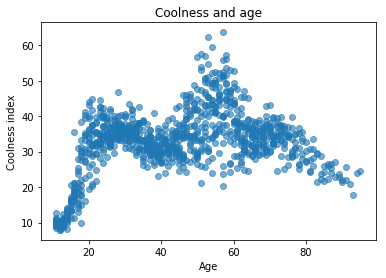

In [78]:
plt.scatter(cool_data['Age'], cool_data['Coolness'], alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Coolness index')
plt.title('Coolness and age');

(b)

In [47]:
import statsmodels.api as sm

In [66]:
cool_data['group1'] = ((cool_data['Age'] >= 11) & (cool_data['Age'] < 22)).astype('int32')
cool_data['group2'] = ((cool_data['Age'] >= 22) & (cool_data['Age'] < 40)).astype('int32')
cool_data['group3'] = ((cool_data['Age'] >= 40) & (cool_data['Age'] < 59)).astype('int32')
cool_data['group4'] = ((cool_data['Age'] >= 59) & (cool_data['Age'] < 77)).astype('int32')
cool_data['group5'] = ((cool_data['Age'] >= 77) & (cool_data['Age'] < 95)).astype('int32')
cool_data.head()

,Age,Coolness,group1,group2,group3,group4,group5
0,11.0,10.981602,1,0,0,0,0
1,11.0,11.364925,1,0,0,0,0
2,11.0,10.190227,1,0,0,0,0
3,11.0,9.903725,1,0,0,0,0
4,11.0,8.997918,1,0,0,0,0


In [67]:
reg1 = sm.OLS(endog=cool_data['Coolness'], exog=cool_data[['group1', 'group2', 'group3', 'group4', 'group5']], missing='drop')
result1 = reg1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:               Coolness   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     4280.
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        00:09:26   Log-Likelihood:                -3220.5
No. Observations:                 956   AIC:                             6451.
Df Residuals:                     951   BIC:                             6475.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
group1        20.1025      0.566     35.522      0.0

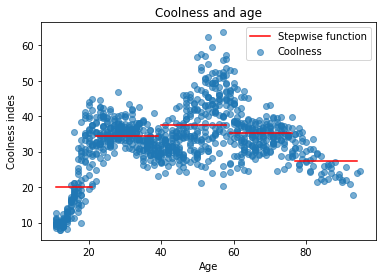

In [86]:
plt.scatter(cool_data['Age'], cool_data['Coolness'], alpha=0.6)
plt.plot(range(11,22), np.array([20.1025 for _ in range(11,22)]),color='r')
plt.plot(range(22,40), np.array([34.4758 for _ in range(22,40)]),color='r')
plt.plot(range(40,59), np.array([37.6351 for _ in range(40,59)]),color='r')
plt.plot(range(59,77), np.array([35.2254 for _ in range(59,77)]),color='r')
plt.plot(range(77,95), np.array([27.2964 for _ in range(77,95)]),color='r', label='Stepwise function')
plt.xlabel('Age')
plt.ylabel('Coolness indes')
plt.title('Coolness and age')
plt.legend();

In [88]:
pred_73 = result1.predict(exog=[0, 0, 0, 1, 0])
print(f'The predicted coolness for a 73 year old is {pred_73[0]}.')

The predicted coolness for a 73 year old is 35.22540004024275.


(c)

In [89]:
from scipy.interpolate import LSQUnivariateSpline

In [103]:
knots =[22,40,59,77]
cool_data2 = cool_data.sort_values(by='Age').groupby('Age').mean()
result2 = LSQUnivariateSpline(cool_data2.index, cool_data2['Coolness'], t=knots, k=1)

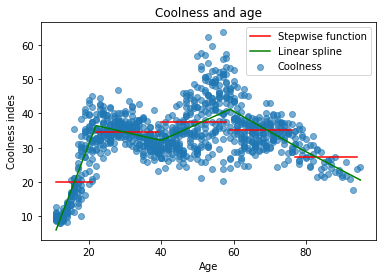

In [104]:
age2 = np.linspace(11, 95, 200)
plt.scatter(cool_data['Age'], cool_data['Coolness'], alpha=0.6)
plt.plot(range(11,22), np.array([20.1025 for _ in range(11,22)]),color='r')
plt.plot(range(22,40), np.array([34.4758 for _ in range(22,40)]),color='r')
plt.plot(range(40,59), np.array([37.6351 for _ in range(40,59)]),color='r')
plt.plot(range(59,77), np.array([35.2254 for _ in range(59,77)]),color='r')
plt.plot(range(77,95), np.array([27.2964 for _ in range(77,95)]),color='r', label='Stepwise function')
plt.plot(age2, result2(age2),color='g', label='Linear spline')
plt.xlabel('Age')
plt.ylabel('Coolness indes')
plt.title('Coolness and age')
plt.legend();

In [105]:
print(f'The predicted coolness for a 73 year old is {result2(73)}.')

The predicted coolness for a 73 year old is 32.86784862349653.


(d)

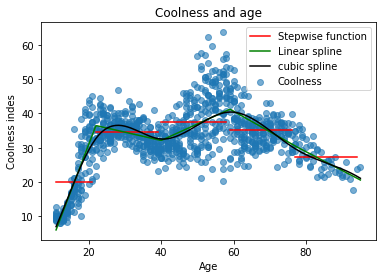

In [107]:
result3 = LSQUnivariateSpline(cool_data2.index, cool_data2['Coolness'], t=knots, k=3)
plt.scatter(cool_data['Age'], cool_data['Coolness'], alpha=0.6)
plt.plot(range(11,22), np.array([20.1025 for _ in range(11,22)]),color='r')
plt.plot(range(22,40), np.array([34.4758 for _ in range(22,40)]),color='r')
plt.plot(range(40,59), np.array([37.6351 for _ in range(40,59)]),color='r')
plt.plot(range(59,77), np.array([35.2254 for _ in range(59,77)]),color='r')
plt.plot(range(77,95), np.array([27.2964 for _ in range(77,95)]),color='r', label='Stepwise function')
plt.plot(age2, result2(age2),color='g', label='Linear spline')
plt.plot(age2, result3(age2),color='k', label='cubic spline')
plt.xlabel('Age')
plt.ylabel('Coolness indes')
plt.title('Coolness and age')
plt.legend();

In [108]:
print(f'The predicted coolness for a 73 year old is {result3(73)}.')

The predicted coolness for a 73 year old is 32.642301066279764.
